In [1]:
%load_ext autoreload
%autoreload 2
# this only works on startup!
from jax import config
config.update("jax_enable_x64", True)

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = '1'



from encoding_information.gpu_utils import limit_gpu_memory_growth
limit_gpu_memory_growth()

from cleanplots import *
from tqdm import tqdm
from signal_utils_1D import *
from plot_utils_1D import *

2024-01-24 08:59:39.194874: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
from scipy.signal import resample

N_objects = 5000
noise_sigma = 1e-3
num_nyquist_samples_list = [4, 9, 16, 25, 36]
num_bootstrap_samples = 11
upsampling_factor = 64
max_epochs = 5000
confidence = 90

object_names = ['white_noise', 'delta_uniform', '8_deltas_uniform']

num_nyquist_samples = NUM_NYQUIST_SAMPLES


def white_noise_fn(upsampling_factor):
  # generate a random object at the lowest resolution
  objects = []
  for i in range(N_objects):  
    object = generate_random_object('white_noise', object_size=upsampling_factor*num_nyquist_samples_list[0])
    # upsample it
    object = resample(object, upsampled_signal_length)
    objects.append(object)
  # print(objects[0].shape)
  return np.array(objects) 

mi_by_object = {}
mi_by_object_hi = {}
mi_by_object_lo = {}
for name in object_names:
  print(name)
  mutual_information = []
  mi_hi = []
  mi_lo = []
  for num_nyquist_samples in tqdm(num_nyquist_samples_list):
    upsampled_signal_length = upsampling_factor*num_nyquist_samples
    
    if name == 'delta_uniform':
      objects_fn = lambda : np.array([generate_random_object('delta', num_deltas=1, object_size=upsampled_signal_length) for i in range(N_objects)])
    elif name == '8_deltas_uniform':
      objects_fn = lambda :np.array([generate_random_object('delta', num_deltas=8, object_size=upsampled_signal_length) for i in range(N_objects)])
    else:
      objects_fn = lambda : white_noise_fn(upsampling_factor)

    runs = []
    for i in range(num_bootstrap_samples):
      initial_kernel, initial_params, optimized_params, objects, initial_mi, optimized_mi = optimize_PSF_and_estimate_mi(
          objects_fn, noise_sigma, num_nyquist_samples=num_nyquist_samples, upsampled_signal_length=upsampling_factor*num_nyquist_samples,
          max_epochs=max_epochs, 
          )
      runs.append(optimized_mi)
    runs = np.array(runs)
    mutual_information.append(np.median(runs))
    mi_lo.append(np.percentile(np.array(runs), 100-confidence))
    mi_hi.append(np.percentile(np.array(runs), confidence))
  mi_by_object[name] = mutual_information
  mi_by_object_hi[name] = mi_hi
  mi_by_object_lo[name] = mi_lo

white_noise


  0%|                                        | 0/5 [00:00<?, ?it/s]

initial loss -1.4351245316175762
computing optimized mi


2024-01-24 09:01:20.304945: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.


initial loss -1.2294846109158586
computing optimized mi
initial loss -1.3213838476841826
computing optimized mi
initial loss -1.0855683726885292
computing optimized mi
initial loss -1.0276858143730252
computing optimized mi
initial loss -1.0972681087806002
computing optimized mi
initial loss -1.4877647263634874
computing optimized mi
initial loss -0.9928969192768811
computing optimized mi
initial loss -1.5548116721162595
computing optimized mi
initial loss -1.0282159284470265
computing optimized mi
initial loss -1.0313190870471731
computing optimized mi


 20%|█████▌                      | 1/5 [17:23<1:09:33, 1043.27s/it]

initial loss -1.3654943235348214
computing optimized mi
initial loss -1.372306018343337
computing optimized mi
initial loss -1.207010592715374
computing optimized mi
initial loss -1.250322629749297
computing optimized mi
initial loss -1.0222818077047553
computing optimized mi
initial loss -1.060308722124411
computing optimized mi
initial loss -1.5777446291891706
computing optimized mi
initial loss -1.538615824313398
computing optimized mi
initial loss -1.476793707623633
computing optimized mi
initial loss -1.5545804107367673
computing optimized mi
initial loss -1.219399867768056
computing optimized mi


 40%|███████████▏                | 2/5 [47:51<1:15:14, 1504.89s/it]

initial loss -1.2214716396490304
computing optimized mi
initial loss -1.208339901609887
computing optimized mi
initial loss -0.99285797652208
computing optimized mi
initial loss -1.3618753597755557
computing optimized mi
initial loss -0.9963826116433857
computing optimized mi
initial loss -1.3489958813809746
computing optimized mi
initial loss -1.088696933216232
computing optimized mi
initial loss -0.981545362809445
computing optimized mi
initial loss -0.783292705033303
computing optimized mi
initial loss -1.4006207706405762
computing optimized mi
initial loss -1.1784384124017169
computing optimized mi


 60%|███████████████▌          | 3/5 [1:55:59<1:29:29, 2684.53s/it]

initial loss -0.9038723505237038
computing optimized mi
initial loss -0.7588161907671463
computing optimized mi
initial loss -1.0854034689131051
computing optimized mi
initial loss -1.1725323259533116
computing optimized mi
initial loss -1.0385924110455031
computing optimized mi
initial loss -1.1180959243776856
computing optimized mi
initial loss -0.8666546985426673
computing optimized mi
initial loss -1.0169043881357325
computing optimized mi
initial loss -1.2031998826843493
computing optimized mi
initial loss -1.202618094624439
computing optimized mi
initial loss -1.1481358113759559
computing optimized mi


 80%|████████████████████▊     | 4/5 [4:13:24<1:21:19, 4879.57s/it]

initial loss -1.1406003377692637
computing optimized mi
initial loss -0.9709412457459999
computing optimized mi
initial loss -0.9959153501109329
computing optimized mi
initial loss -1.0039235803854587
computing optimized mi
initial loss -0.7216876376052735
computing optimized mi
initial loss -1.210578662740027
computing optimized mi
initial loss -0.8276475993784611
computing optimized mi
initial loss -1.0845882573490238
computing optimized mi
initial loss -1.0505440487189963
computing optimized mi
initial loss -0.7020567639116297
computing optimized mi
initial loss -0.7408405803806999
computing optimized mi


100%|████████████████████████████| 5/5 [8:37:52<00:00, 6214.51s/it]


delta_uniform


  0%|                                        | 0/5 [00:00<?, ?it/s]

initial loss -5.3618222137141185
computing optimized mi
initial loss -4.619525475869555
computing optimized mi
initial loss -5.156557078401765
computing optimized mi
initial loss -4.879798012597423
computing optimized mi
initial loss -5.247395499423028
computing optimized mi
initial loss -5.744384810440845
computing optimized mi
initial loss -5.240675262709299
computing optimized mi
initial loss -5.41329941653761
computing optimized mi
initial loss -5.264176581686803
computing optimized mi
initial loss -4.756614055532496
computing optimized mi
initial loss -5.317287951000417
computing optimized mi


 20%|██████▏                        | 1/5 [10:40<42:40, 640.05s/it]

initial loss -5.0256228272167665
computing optimized mi
initial loss -4.811269849253607
computing optimized mi
initial loss -4.9537849572344905
computing optimized mi
initial loss -5.044776040764622
computing optimized mi
initial loss -4.68787362572752
computing optimized mi
initial loss -5.147018072716258
computing optimized mi
initial loss -5.016854512630938
computing optimized mi
initial loss -4.790887361310056
computing optimized mi
initial loss -4.5571618573851405
computing optimized mi
initial loss -5.047117587291786
computing optimized mi
initial loss -5.002156104543311
computing optimized mi


 40%|████████████                  | 2/5 [35:03<56:12, 1124.17s/it]

initial loss -4.031300347774605
computing optimized mi


/home/hpinkard_waller/GitRepos/EncodingInformation/encoding_information/information_estimation.py:226: UserWarning: 0.01% of pixels are negative.
  warnings.warn(f"{np.sum(clean_images_if_available < 0) / clean_images_if_available.size:.2%} of pixels are negative.")


initial loss -4.359288761803938
computing optimized mi


/home/hpinkard_waller/GitRepos/EncodingInformation/encoding_information/information_estimation.py:226: UserWarning: 0.02% of pixels are negative.
  warnings.warn(f"{np.sum(clean_images_if_available < 0) / clean_images_if_available.size:.2%} of pixels are negative.")


initial loss -4.132441509454197
computing optimized mi
initial loss -4.487627824685866
computing optimized mi
initial loss -4.087603391108919
computing optimized mi
initial loss -4.0591581660611
computing optimized mi
initial loss -3.894071520861001
computing optimized mi
initial loss -3.734262812331056
computing optimized mi
initial loss -3.8264127198285944
computing optimized mi
initial loss -4.163878754209562
computing optimized mi
initial loss -4.4595801326122855
computing optimized mi


 60%|███████████████▌          | 3/5 [1:34:47<1:14:54, 2247.47s/it]

initial loss -3.38870401826866
computing optimized mi


/home/hpinkard_waller/GitRepos/EncodingInformation/encoding_information/information_estimation.py:226: UserWarning: 0.21% of pixels are negative.
  warnings.warn(f"{np.sum(clean_images_if_available < 0) / clean_images_if_available.size:.2%} of pixels are negative.")


initial loss -3.3926497329469107
computing optimized mi


/home/hpinkard_waller/GitRepos/EncodingInformation/encoding_information/information_estimation.py:226: UserWarning: 0.23% of pixels are negative.
  warnings.warn(f"{np.sum(clean_images_if_available < 0) / clean_images_if_available.size:.2%} of pixels are negative.")


initial loss -3.242978949525035
computing optimized mi
initial loss -3.082498832957106
computing optimized mi


/home/hpinkard_waller/GitRepos/EncodingInformation/encoding_information/information_estimation.py:226: UserWarning: 0.26% of pixels are negative.
  warnings.warn(f"{np.sum(clean_images_if_available < 0) / clean_images_if_available.size:.2%} of pixels are negative.")


initial loss -3.5383892060637665
computing optimized mi
initial loss -3.233600179366495
computing optimized mi


/home/hpinkard_waller/GitRepos/EncodingInformation/encoding_information/information_estimation.py:226: UserWarning: 0.29% of pixels are negative.
  warnings.warn(f"{np.sum(clean_images_if_available < 0) / clean_images_if_available.size:.2%} of pixels are negative.")


initial loss -3.6627115430413886
computing optimized mi


/home/hpinkard_waller/GitRepos/EncodingInformation/encoding_information/information_estimation.py:226: UserWarning: 0.24% of pixels are negative.
  warnings.warn(f"{np.sum(clean_images_if_available < 0) / clean_images_if_available.size:.2%} of pixels are negative.")


initial loss -3.4156670593161595
computing optimized mi
initial loss -3.2320177772035823
computing optimized mi


/home/hpinkard_waller/GitRepos/EncodingInformation/encoding_information/information_estimation.py:226: UserWarning: 0.19% of pixels are negative.
  warnings.warn(f"{np.sum(clean_images_if_available < 0) / clean_images_if_available.size:.2%} of pixels are negative.")


initial loss -3.5746355104712864
computing optimized mi
initial loss -3.718443113735148
computing optimized mi


/home/hpinkard_waller/GitRepos/EncodingInformation/encoding_information/information_estimation.py:226: UserWarning: 0.14% of pixels are negative.
  warnings.warn(f"{np.sum(clean_images_if_available < 0) / clean_images_if_available.size:.2%} of pixels are negative.")
 80%|████████████████████▊     | 4/5 [3:40:11<1:12:10, 4330.56s/it]

initial loss -2.820975654259209
computing optimized mi


/home/hpinkard_waller/GitRepos/EncodingInformation/encoding_information/information_estimation.py:226: UserWarning: 2.77% of pixels are negative.
  warnings.warn(f"{np.sum(clean_images_if_available < 0) / clean_images_if_available.size:.2%} of pixels are negative.")


initial loss -2.816786255604981
computing optimized mi


/home/hpinkard_waller/GitRepos/EncodingInformation/encoding_information/information_estimation.py:226: UserWarning: 2.27% of pixels are negative.
  warnings.warn(f"{np.sum(clean_images_if_available < 0) / clean_images_if_available.size:.2%} of pixels are negative.")


initial loss -3.0413644242789277
computing optimized mi


/home/hpinkard_waller/GitRepos/EncodingInformation/encoding_information/information_estimation.py:226: UserWarning: 2.85% of pixels are negative.
  warnings.warn(f"{np.sum(clean_images_if_available < 0) / clean_images_if_available.size:.2%} of pixels are negative.")


initial loss -2.6668534351835
computing optimized mi


/home/hpinkard_waller/GitRepos/EncodingInformation/encoding_information/information_estimation.py:226: UserWarning: 2.75% of pixels are negative.
  warnings.warn(f"{np.sum(clean_images_if_available < 0) / clean_images_if_available.size:.2%} of pixels are negative.")


initial loss -3.088888984263458
computing optimized mi


/home/hpinkard_waller/GitRepos/EncodingInformation/encoding_information/information_estimation.py:226: UserWarning: 2.79% of pixels are negative.
  warnings.warn(f"{np.sum(clean_images_if_available < 0) / clean_images_if_available.size:.2%} of pixels are negative.")


initial loss -3.1779645531417096
computing optimized mi


/home/hpinkard_waller/GitRepos/EncodingInformation/encoding_information/information_estimation.py:226: UserWarning: 2.53% of pixels are negative.
  warnings.warn(f"{np.sum(clean_images_if_available < 0) / clean_images_if_available.size:.2%} of pixels are negative.")


initial loss -2.8767349391682733
computing optimized mi


/home/hpinkard_waller/GitRepos/EncodingInformation/encoding_information/information_estimation.py:226: UserWarning: 3.05% of pixels are negative.
  warnings.warn(f"{np.sum(clean_images_if_available < 0) / clean_images_if_available.size:.2%} of pixels are negative.")


initial loss -2.9886152154133034
computing optimized mi


/home/hpinkard_waller/GitRepos/EncodingInformation/encoding_information/information_estimation.py:226: UserWarning: 2.31% of pixels are negative.
  warnings.warn(f"{np.sum(clean_images_if_available < 0) / clean_images_if_available.size:.2%} of pixels are negative.")


initial loss -3.0623550869903147
computing optimized mi


/home/hpinkard_waller/GitRepos/EncodingInformation/encoding_information/information_estimation.py:226: UserWarning: 2.54% of pixels are negative.
  warnings.warn(f"{np.sum(clean_images_if_available < 0) / clean_images_if_available.size:.2%} of pixels are negative.")


initial loss -2.6199518097801398
computing optimized mi


/home/hpinkard_waller/GitRepos/EncodingInformation/encoding_information/information_estimation.py:226: UserWarning: 2.59% of pixels are negative.
  warnings.warn(f"{np.sum(clean_images_if_available < 0) / clean_images_if_available.size:.2%} of pixels are negative.")


initial loss -3.242482150539066
computing optimized mi


/home/hpinkard_waller/GitRepos/EncodingInformation/encoding_information/information_estimation.py:226: UserWarning: 2.36% of pixels are negative.
  warnings.warn(f"{np.sum(clean_images_if_available < 0) / clean_images_if_available.size:.2%} of pixels are negative.")
100%|████████████████████████████| 5/5 [7:48:27<00:00, 5621.48s/it]


8_deltas_uniform


  0%|                                        | 0/5 [00:00<?, ?it/s]

initial loss -3.6849376381988366
computing optimized mi
initial loss -4.228481026037813
computing optimized mi
initial loss -3.8315491376158612
computing optimized mi
initial loss -3.8703249118660734
computing optimized mi
initial loss -4.643931207946938
computing optimized mi
initial loss -4.082633572494535
computing optimized mi
initial loss -3.6944217756217026
computing optimized mi
initial loss -3.8802528841674944
computing optimized mi
initial loss -4.246218678267122
computing optimized mi
initial loss -3.878332496697099
computing optimized mi
initial loss -4.773636950466132
computing optimized mi


 20%|██████▏                        | 1/5 [11:27<45:51, 687.89s/it]

initial loss -3.4782114170968685
computing optimized mi
initial loss -3.2250547513746346
computing optimized mi
initial loss -3.3954767071052534
computing optimized mi
initial loss -3.3614231135296797
computing optimized mi
initial loss -3.8536472736622787
computing optimized mi
initial loss -3.856856231831127
computing optimized mi
initial loss -3.52419645683952
computing optimized mi
initial loss -3.85349375206307
computing optimized mi
initial loss -3.31565020910877
computing optimized mi
initial loss -3.8672853859303924
computing optimized mi
initial loss -4.133196823361226
computing optimized mi


 40%|████████████                  | 2/5 [35:56<57:20, 1146.99s/it]

initial loss -2.7079226623917076
computing optimized mi
initial loss -2.668591755327655
computing optimized mi
initial loss -2.733723877381885
computing optimized mi
initial loss -2.6564959707113696
computing optimized mi
initial loss -3.1534478986061787
computing optimized mi
initial loss -3.0045490645537725
computing optimized mi
initial loss -2.919999163689872
computing optimized mi
initial loss -2.980397488603584
computing optimized mi
initial loss -2.6351562714407737
computing optimized mi
initial loss -2.4023528631651825
computing optimized mi
initial loss -3.2558270678812273
computing optimized mi


 60%|███████████████▌          | 3/5 [1:36:22<1:15:58, 2279.30s/it]

initial loss -1.803333377429691
computing optimized mi
initial loss -2.3034970111686093
computing optimized mi
initial loss -1.872727141524324
computing optimized mi
initial loss -2.0274679576947667
computing optimized mi
initial loss -2.2286632775538737
computing optimized mi
initial loss -2.1273182655775016
computing optimized mi
initial loss -2.3095945940379528
computing optimized mi
initial loss -2.4784555366878833
computing optimized mi
initial loss -2.0193554980935353
computing optimized mi
initial loss -2.0220593280112373
computing optimized mi
initial loss -1.9362639450677452
computing optimized mi


 80%|████████████████████▊     | 4/5 [3:42:36<1:12:49, 4369.39s/it]

initial loss -1.647731559084346
computing optimized mi


/home/hpinkard_waller/GitRepos/EncodingInformation/encoding_information/information_estimation.py:226: UserWarning: 0.03% of pixels are negative.
  warnings.warn(f"{np.sum(clean_images_if_available < 0) / clean_images_if_available.size:.2%} of pixels are negative.")


initial loss -1.5358732321878554
computing optimized mi


/home/hpinkard_waller/GitRepos/EncodingInformation/encoding_information/information_estimation.py:226: UserWarning: 0.04% of pixels are negative.
  warnings.warn(f"{np.sum(clean_images_if_available < 0) / clean_images_if_available.size:.2%} of pixels are negative.")


initial loss -1.4506514212487338
computing optimized mi
initial loss -1.8453454017304212
computing optimized mi
initial loss -1.8870975574042705
computing optimized mi


/home/hpinkard_waller/GitRepos/EncodingInformation/encoding_information/information_estimation.py:226: UserWarning: 0.05% of pixels are negative.
  warnings.warn(f"{np.sum(clean_images_if_available < 0) / clean_images_if_available.size:.2%} of pixels are negative.")


initial loss -1.8482873517818998
computing optimized mi
initial loss -1.7669642897791678
computing optimized mi
initial loss -1.4238202746470014
computing optimized mi
initial loss -1.646104434855656
computing optimized mi
initial loss -1.6031025332521258
computing optimized mi
initial loss -1.3836126205363553
computing optimized mi


100%|████████████████████████████| 5/5 [7:50:54<00:00, 5650.95s/it]


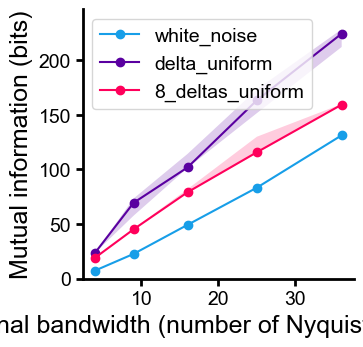

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(3.5, 3.5))

for object_name, mutual_information in mi_by_object.items():

    total_mi = np.array(mutual_information) * np.array(num_nyquist_samples_list)

    total_mi_hi = np.array(mi_by_object_hi[object_name]) * np.array(num_nyquist_samples_list)
    total_mi_lo = np.array(mi_by_object_lo[object_name]) * np.array(num_nyquist_samples_list)

    ax.plot(num_nyquist_samples_list, total_mi, 'o-', label=object_name)
    ax.fill_between(num_nyquist_samples_list, total_mi_lo, total_mi_hi, alpha=0.2)
    ax.set_xlabel('Signal bandwidth (number of Nyquist samples)')
    ax.set_ylabel('Mutual information (bits)')

    ax.set(ylim=(0, max(1.1 * np.max(total_mi), ax.get_ylim()[1])))
    # ax.set(ylim=[0, 25])

clear_spines(ax)
ax.legend()

fig.savefig('/home/hpinkard_waller/figures/1d_signals/' + 'mi_vs_bandwidth' + '.pdf', transparent=True)


In [4]:
# fig, ax = plt.subplots(1, 1, figsize=(3.5, 3.5))

# for object_name, mutual_information in mi_by_object.items():

#     total_mi = np.array(mutual_information) * np.array(num_nyquist_samples_list)
#     ax.semilogx(num_nyquist_samples_list, total_mi, 'o-', label=object_name)
#     ax.set_xlabel('Signal bandwidth (number of Nyquist samples)')
#     ax.set_ylabel('Mutual information (bits)')

#     ax.set(ylim=(0, max(1.1 * np.max(total_mi), ax.get_ylim()[1])))

# clear_spines(ax)
# ax.legend()

# fig.savefig('/home/hpinkard_waller/figures/1d_signals/' + 'mi_vs_bandwidth' + '.pdf', transparent=True)
